In [1]:
import numpy as np               
import pandas as pd 
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download()
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

import nltk
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('punkt')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [34]:
reviews = pd.read_csv("amazon_cells_labelled.csv")

In [35]:
pd.set_option('display.max_colwidth', None)

In [36]:
reviews

,Text,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it touches your ear and face.,0
996,What a piece of junk.. I lose more calls on this phone.,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra red port (irda).,0


In [37]:
reviews.shape

(1000, 2)

In [38]:
reviews['Sentiment'].value_counts()

Sentiment
0    500
1    500
Name: count, dtype: int64

# Data Pre Processing

In [39]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[0 1 1 0 1 0 0 1 0 0]
0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: Sentiment, dtype: int64


In [40]:
#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

In [41]:
reviews.dtypes

Text         string[python]
Sentiment             int64
dtype: object

In [52]:
#get the review text for preprocessing
text = reviews['Text']
text[:50]

0                                      So there is no way for me to plug it in here in the US unless I go by a converter.
1                                                                                             Good case, Excellent value.
2                                                                                                  Great for the jawbone.
3                                         Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
4                                                                                                       The mic is great.
5                                              I have to jiggle the plug to get it to line up right to get decent volume.
6         If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.
7                                                                             If you are Razr owner...you must have this!
8                       

In [51]:
text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))  
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)
    
 
text1[:50]

['so there is no way for me to plug it in here in the us unless i go by a converter',
 'good case excellent value',
 'great for the jawbone',
 'tied to charger for conversations lasting more than  minutesmajor problems',
 'the mic is great',
 'i have to jiggle the plug to get it to line up right to get decent volume',
 'if you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one',
 'if you are razr owneryou must have this',
 'needless to say i wasted my money',
 'what a waste of money and time',
 'and the sound quality is great',
 'he was very impressed when going from the original battery to the extended battery',
 'if the two were seperated by a mere  ft i started to notice excessive static and garbled sound from the headset',
 'very good quality though',
 'the design is very odd as the ear clip is not very comfortable at all',
 'highly recommend for any one who has a blue tooth phone',
 'i advise everyone do not be fooled',
 'so far 

In [53]:
text1 = pd.Series(text1)
text1[:50]

0                                    so there is no way for me to plug it in here in the us unless i go by a converter
1                                                                                            good case excellent value
2                                                                                                great for the jawbone
3                                           tied to charger for conversations lasting more than  minutesmajor problems
4                                                                                                     the mic is great
5                                            i have to jiggle the plug to get it to line up right to get decent volume
6        if you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one
7                                                                              if you are razr owneryou must have this
8                                               

In [54]:
#remove stop words
    
#Setting English stopwords
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text1[:50]

0                                                     way plug us unless go converter
1                                                           good case excellent value
2                                                                       great jawbone
3                            tied charger conversations lasting minutesmajor problems
4                                                                           mic great
5                                        jiggle plug get line right get decent volume
6                  several dozen several hundred contacts imagine fun sending one one
7                                                                  razr owneryou must
8                                                           needless say wasted money
9                                                                    waste money time
10                                                                sound quality great
11                                  impressed going or

In [55]:
#apply lemmatising with POS tags

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text2 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text2[:50] #notice that it does a better job

0                                                   way plug u unless go converter
1                                                        good case excellent value
2                                                                    great jawbone
3                               tie charger conversation last minutesmajor problem
4                                                                        mic great
5                                     jiggle plug get line right get decent volume
6                   several dozen several hundred contact imagine fun send one one
7                                                               razr owneryou must
8                                                           needle say waste money
9                                                                 waste money time
10                                                             sound quality great
11                                    impressed go original battery extend battery
12  

In [56]:
def remove_short_words(text, min_length=2):
    return ' '.join([word for word in text.split() if len(word) > min_length])


text3 = text2.apply(remove_short_words)

# Print the preprocessed text
for sentence in text3:
    print(sentence)


way plug unless converter
good case excellent value
great jawbone
tie charger conversation last minutesmajor problem
mic great
jiggle plug get line right get decent volume
several dozen several hundred contact imagine fun send one one
razr owneryou must
needle say waste money
waste money time
sound quality great
impressed original battery extend battery
two seperated mere start notice excessive static garble sound headset
good quality though
design odd ear clip comfortable
highly recommend one blue tooth phone
advise everyone fool
far good
work great
click place way make wonder long mechanism would last
motorolas website follow direction could get pair
bought use kindle fire absolutely love
commercial mislead
yet run new battery two bar thats three day without charge
bought mother problem battery
great pocket phone combination
ive own phone month say best mobile phone ive
didnt think instruction provide helpful
people couldnt hear talk pull earphone talk phone
doesnt hold charge
simple

In [49]:
# Stemming after lemmitising Can further reduce words to a common base, potentially capturing additional similarities.

In [50]:
reviews1 = list(zip(text3 , label))

reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor pro...,0
4,mic great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece junk lose call phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [91]:
# Save the DataFrame to a new CSV file
reviewsP.to_csv('preprocessed_data.csv', index=False)


# Classification

In [57]:
import numpy as np               
import pandas as pd 
import nltk
import string
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [58]:
%pip install --upgrade scikit-learn
%pip install --upgrade threadpoolctl
%pip install mkl-service




Note: you may need to restart the kernel to use updated packages.


# Naive Bayes

In [148]:
reviews2 = pd.read_csv('preprocessed_data.csv')

In [149]:
reviews2

,Review,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor problem,0
4,mic great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece junk lose call phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [150]:
reviewsP = pd.DataFrame (reviews2, columns = ['Review', 'Sentiment'])

In [151]:
reviewsP

,Review,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor problem,0
4,mic great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece junk lose call phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [152]:
#split the dataset  

#train dataset by splitting the data
train_reviews = reviewsP.Review[:700]
train_sentiments = reviewsP.Sentiment[:700]

#test dataset
test_reviews = reviewsP.Review[700:]
test_sentiments = reviewsP.Sentiment[700:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(700,) (700,)
(300,) (300,)


In [153]:
train_reviews[0]

'way plug unless converter'

In [154]:
#Count vectorizer for bag of words
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv=CountVectorizer()

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

#vocab=cv.get_feature_names_out() #toget feature names

BOW_cv_train: (700, 1179)
BOW_cv_test: (300, 1179)


In [155]:
print(cv_train_reviews[0])

  (0, 1130)	1
  (0, 766)	1
  (0, 1091)	1
  (0, 217)	1


In [156]:
print(train_sentiments)
print(test_sentiments)

0      0
1      1
2      1
3      0
4      1
      ..
695    0
696    1
697    0
698    1
699    1
Name: Sentiment, Length: 700, dtype: int64
700    0
701    1
702    1
703    1
704    0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Sentiment, Length: 300, dtype: int64


In [163]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(test_sentiments, NB_bow_predict)
cm1

array([[117,  39],
       [ 21, 123]], dtype=int64)

<Axes: >

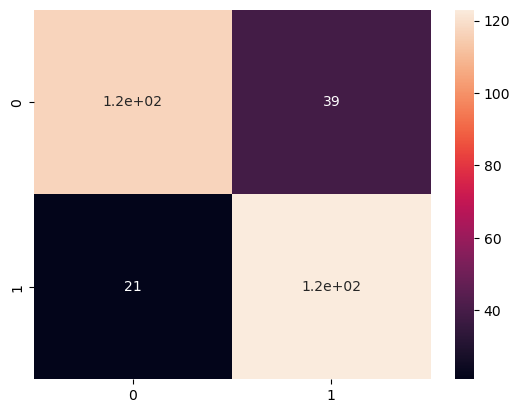

In [164]:
import seaborn as sns
sns.heatmap(cm1, annot=True)

NB_bow accuracy : 0.8
[[117  39]
 [ 21 123]] 

              precision    recall  f1-score   support

    Positive       0.85      0.75      0.80       156
    Negative       0.76      0.85      0.80       144

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300

roc_auc_score for NB:  0.8020833333333334


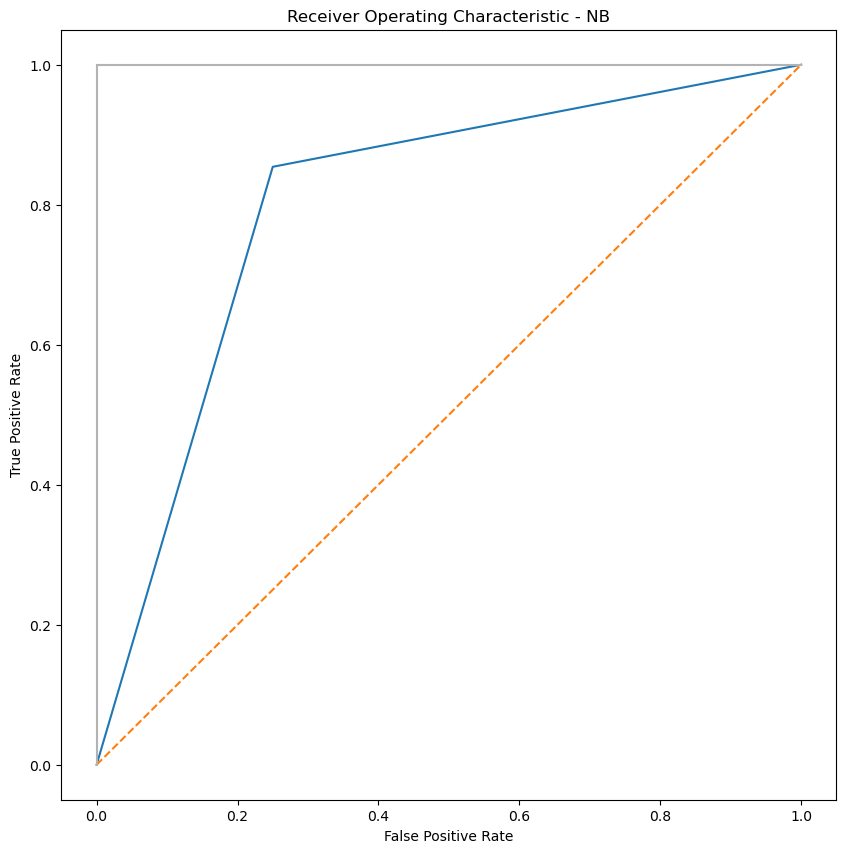

In [160]:
############################################
###             Naive Bayes              ###
############################################

NB = MultinomialNB()

#Fitting the model for Bag of words
NB_bow = NB.fit(cv_train_reviews,train_sentiments)


#Predicting the model for bag of words
NB_bow_predict = NB.predict(cv_test_reviews)


#Accuracy score for bag of words
NB_bow_score=accuracy_score(test_sentiments,NB_bow_predict)
print("NB_bow accuracy :",NB_bow_score)


#Classification report for bag of words 
NB_bow_report=classification_report(test_sentiments,NB_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_bow_predict), '\n')
print(NB_bow_report)



#AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, NB_bow_predict)
print('roc_auc_score for NB: ', roc_auc_score(test_sentiments, NB_bow_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - NB')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machine

In [165]:
reviews3 = pd.read_csv('preprocessed_data.csv')

In [166]:
reviews3

,Review,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor problem,0
4,mic great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece junk lose call phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [167]:
reviewsP = pd.DataFrame (reviews3, columns = ['Review', 'Sentiment'])

In [168]:
#split the dataset  

#train dataset by splitting the data
train_reviews = reviewsP.Review[:700]
train_sentiments = reviewsP.Sentiment[:700]

#test dataset
test_reviews = reviewsP.Review[700:]
test_sentiments = reviewsP.Sentiment[700:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(700,) (700,)
(300,) (300,)


In [169]:
#Count vectorizer for bag of words
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv=CountVectorizer()

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

#vocab=cv.get_feature_names_out() #toget feature names

BOW_cv_train: (700, 1179)
BOW_cv_test: (300, 1179)


In [170]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(test_sentiments, SVM_bow_predict)
cm2

array([[143,  13],
       [ 43, 101]], dtype=int64)

<Axes: >

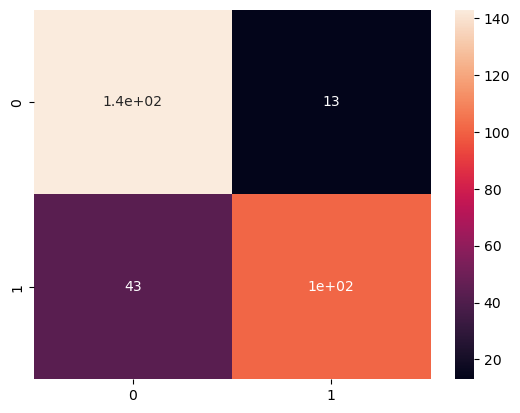

In [171]:
import seaborn as sns
sns.heatmap(cm2, annot=True)

SVM_bow accuracy : 0.8133333333333334
[[143  13]
 [ 43 101]] 

              precision    recall  f1-score   support

    Positive       0.77      0.92      0.84       156
    Negative       0.89      0.70      0.78       144

    accuracy                           0.81       300
   macro avg       0.83      0.81      0.81       300
weighted avg       0.83      0.81      0.81       300

roc_auc_score for SVM:  0.8090277777777777


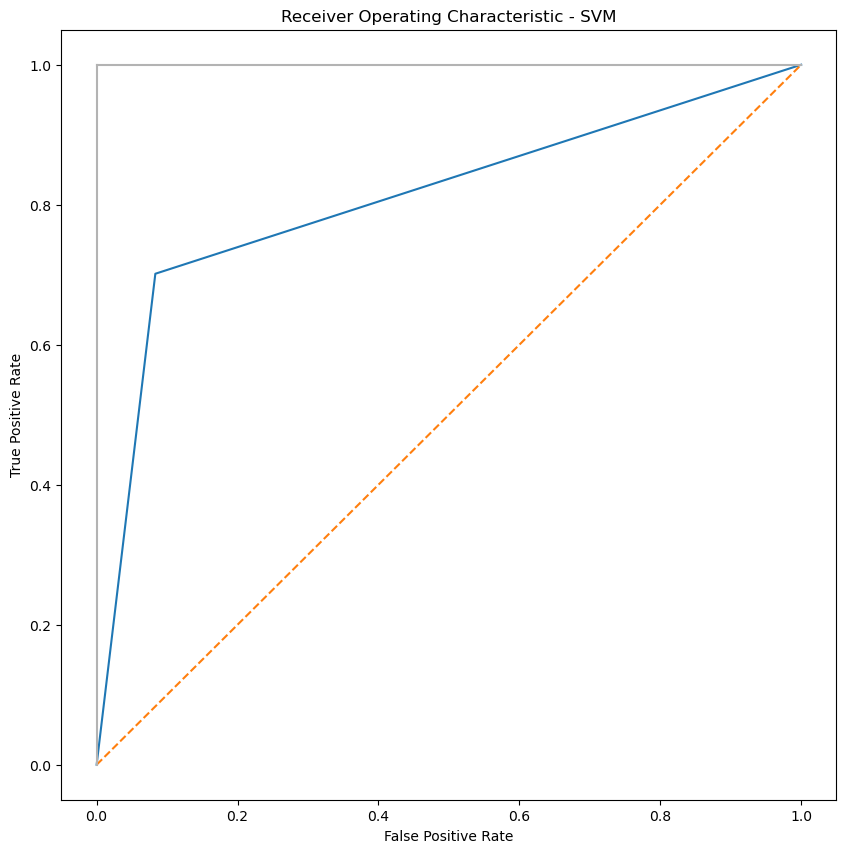

In [172]:
############################################
###                  SVM                 ###
############################################
#linear SVM
SVM = SGDClassifier(loss='hinge',max_iter=500,random_state=0)

#Fitting the model for Bag of words
SVM_bow = SVM.fit(cv_train_reviews,train_sentiments)



#Predicting the model for bag of words
SVM_bow_predict = SVM.predict(cv_test_reviews)



#Accuracy score for bag of words
SVM_bow_score=accuracy_score(test_sentiments,SVM_bow_predict)
print("SVM_bow accuracy :",SVM_bow_score)



#Classification report for bag of words 
SVM_bow_report=classification_report(test_sentiments,SVM_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_bow_predict), '\n')
print(SVM_bow_report)


#AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, SVM_bow_predict)
print('roc_auc_score for SVM: ', roc_auc_score(test_sentiments, SVM_bow_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting

In [173]:
reviews4 = pd.read_csv('preprocessed_data.csv')

In [174]:
reviews4

,Review,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor problem,0
4,mic great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece junk lose call phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [175]:
reviewsP = pd.DataFrame (reviews4, columns = ['Review', 'Sentiment'])

In [176]:
#split the dataset  

#train dataset by splitting the data
train_reviews = reviewsP.Review[:700]
train_sentiments = reviewsP.Sentiment[:700]

#test dataset
test_reviews = reviewsP.Review[700:]
test_sentiments = reviewsP.Sentiment[700:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(700,) (700,)
(300,) (300,)


In [177]:
#Count vectorizer for bag of words
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv=CountVectorizer()

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

#vocab=cv.get_feature_names_out() #toget feature names

BOW_cv_train: (700, 1179)
BOW_cv_test: (300, 1179)


In [178]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(test_sentiments, gradient_boost_bow_predict)
cm3

array([[148,   8],
       [ 78,  66]], dtype=int64)

<Axes: >

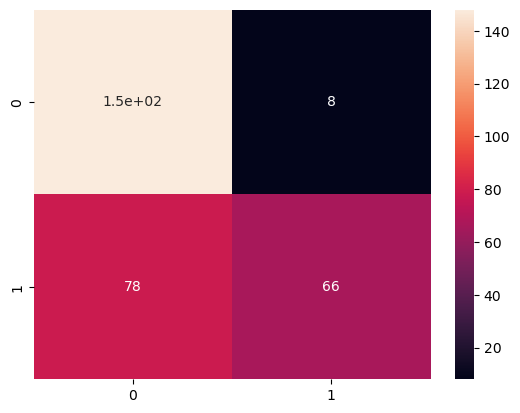

In [179]:
import seaborn as sns
sns.heatmap(cm3, annot=True)

Gradient Boosting (Bag of Words) accuracy: 0.7133333333333334
[[148   8]
 [ 78  66]] 

              precision    recall  f1-score   support

    Positive       0.65      0.95      0.77       156
    Negative       0.89      0.46      0.61       144

    accuracy                           0.71       300
   macro avg       0.77      0.70      0.69       300
weighted avg       0.77      0.71      0.69       300

roc_auc_score for Gradient Boosting:  0.703525641025641


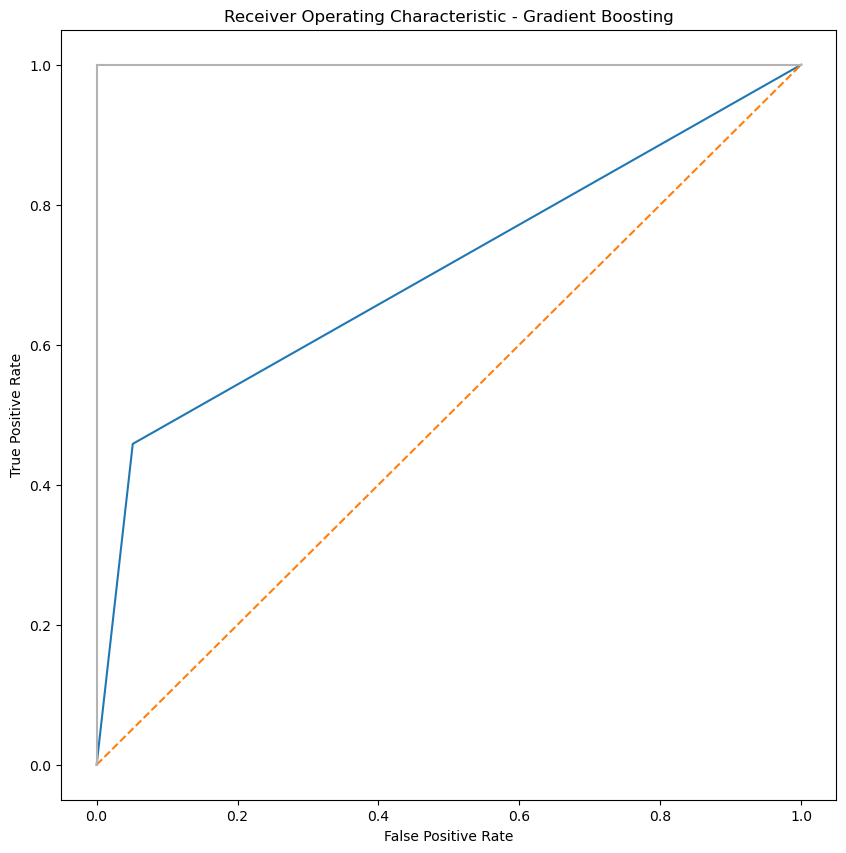

In [180]:
############################################
###           Gradient Boosting          ###
############################################
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting classifier
gradient_boost = GradientBoostingClassifier(n_estimators=20, random_state=0)

# Fitting the model for Bag of words
gradient_boost_bow = gradient_boost.fit(cv_train_reviews, train_sentiments)

# Predicting the model for bag of words
gradient_boost_bow_predict = gradient_boost.predict(cv_test_reviews)

# Accuracy score for bag of words
gradient_boost_bow_score = accuracy_score(test_sentiments, gradient_boost_bow_predict)
print("Gradient Boosting (Bag of Words) accuracy:", gradient_boost_bow_score)

# Classification report for bag of words
gradient_boost_bow_report = classification_report(test_sentiments, gradient_boost_bow_predict, target_names=['Positive', 'Negative'])
print(confusion_matrix(test_sentiments, gradient_boost_bow_predict), '\n')
print(gradient_boost_bow_report)

# AUC score and ROC curve
FP, TP, threshold1 = roc_curve(test_sentiments, gradient_boost_bow_predict)
print('roc_auc_score for Gradient Boosting: ', roc_auc_score(test_sentiments, gradient_boost_bow_predict))

# Plot ROC curve
plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




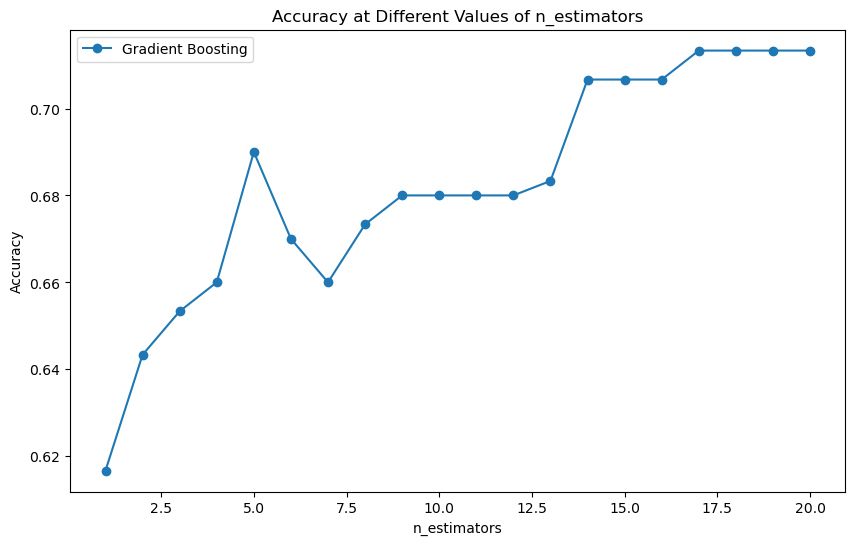

In [181]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create lists to store accuracy scores for different n_estimators
gradient_boost_scores = []
random_forest_scores = []

# Vary the number of estimators from 1 to 20
for n_estimators in range(1, 21):
    # Gradient Boosting
    gradient_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    gradient_boost.fit(cv_train_reviews, train_sentiments)
    gradient_boost_predict = gradient_boost.predict(cv_test_reviews)
    gradient_boost_score = accuracy_score(test_sentiments, gradient_boost_predict)
    gradient_boost_scores.append(gradient_boost_score)


# Plot the accuracy scores for different n_estimators
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), gradient_boost_scores, label='Gradient Boosting', marker='o')
plt.title('Accuracy at Different Values of n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
